In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
data=pd.read_csv("pima.csv")
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (767, 9)


In [10]:
data.groupby('diabetes').size()

diabetes
0    500
1    267
dtype: int64

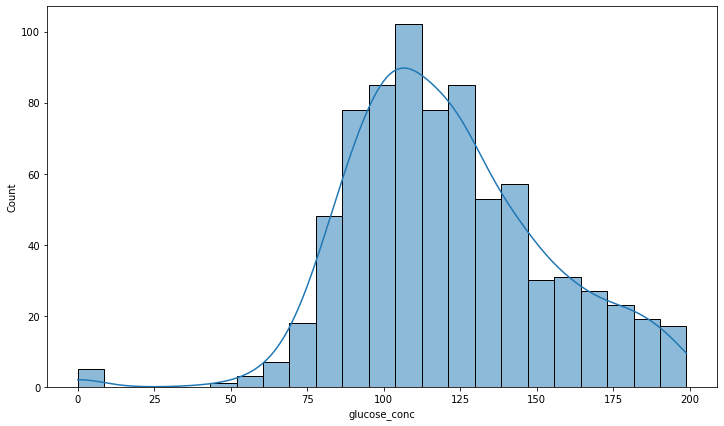

In [3]:
plt.figure(figsize=(12,7))
sns.histplot(data['glucose_conc'],kde=True)

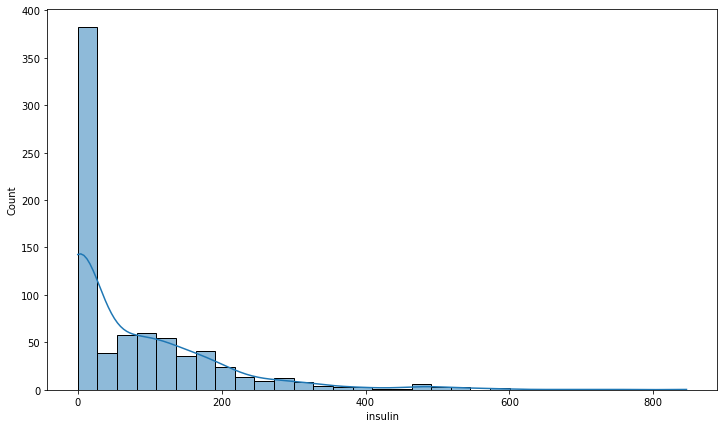

In [6]:
plt.figure(figsize=(12,7))
sns.histplot(data['insulin'],kde=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BAD927E50>,
      dtype=object)

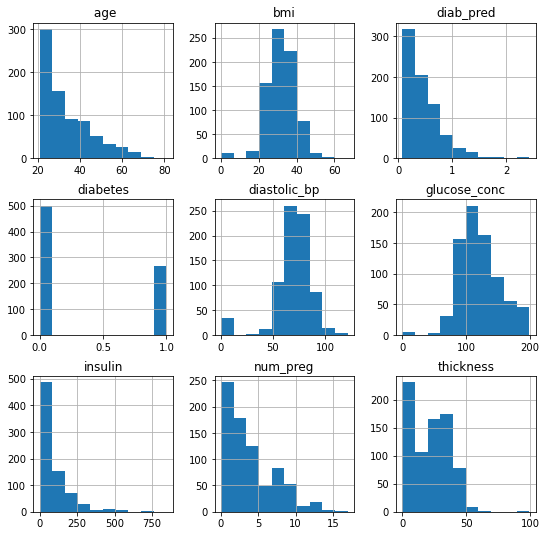

In [8]:
data.hist(figsize=(9, 9))

In [11]:
data.isnull().sum()
data.isna().sum()


num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
 age            0
diabetes        0
dtype: int64

In [12]:
data.isnull().values.any()

False

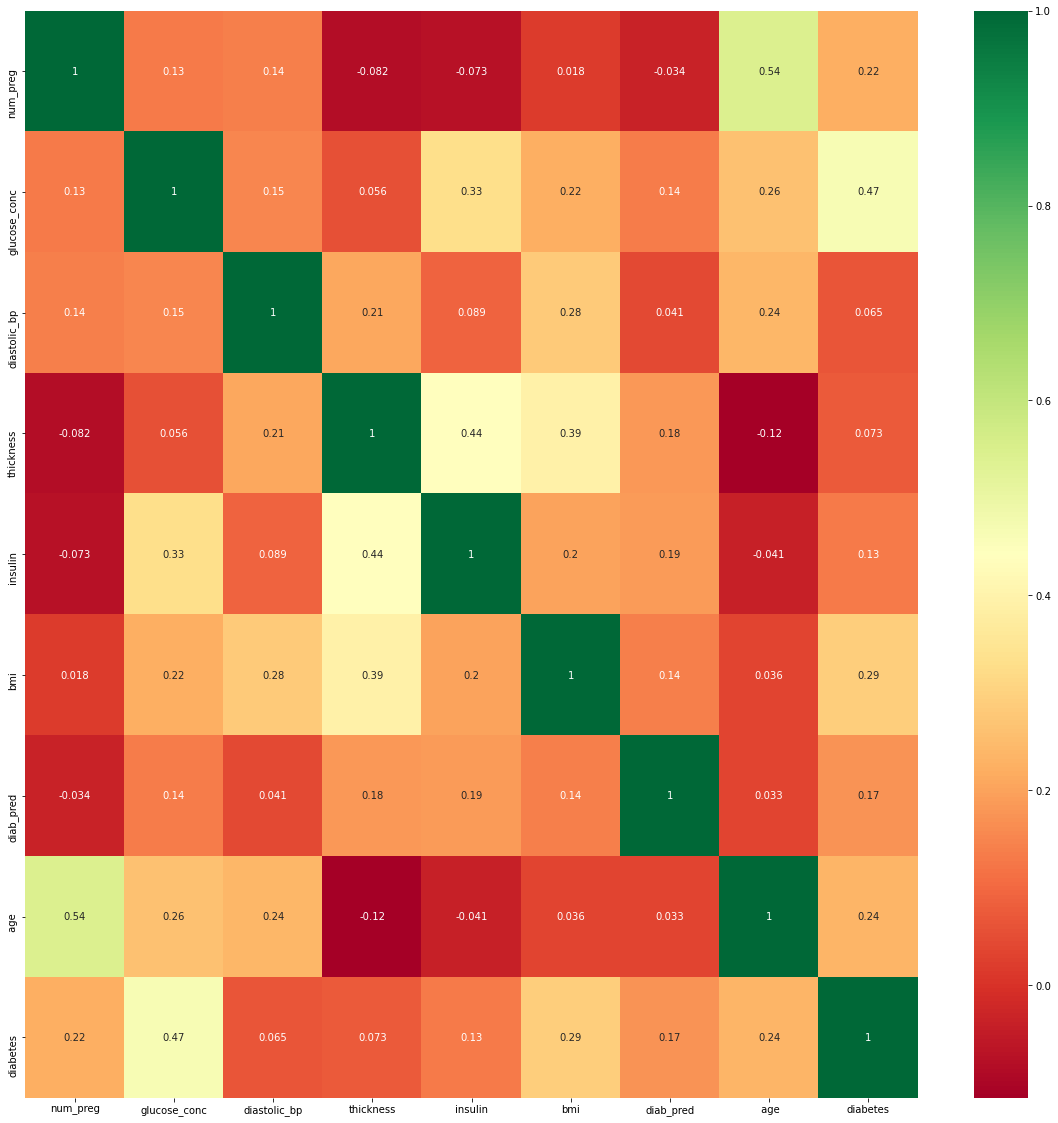

In [13]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
glucose_conc,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
diastolic_bp,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
thickness,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
insulin,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
bmi,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
diab_pred,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
diabetes,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [19]:
diabetes_map = {True: 1, False: 0}

In [20]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [21]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [26]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [27]:
(diabetes_true_count,diabetes_false_count)

(267, 500)

In [37]:
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','diabetes']
predicted_class = ['diabetes']
X = data[feature_columns].values
y = data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [43]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))


total number of rows : 767
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 373
number of rows missing bmi: 11
number of rows missing diab_pred: 0


In [47]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

## RandomForest Algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())
randomforest_prediction = random_forest_model.predict(X_test)

## SVC Algorithm

In [50]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'rbf', random_state = 0)
svc_model.fit(X_train, y_train.ravel())
svc_prediction = svc_model.predict(X_test)

## KNeighborsClassifier Algorithm

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train.ravel())
knn_prediction = knn_classifier.predict(X_test)

## Decision Tree Algorithm

In [54]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisiontree_classifier.fit(X_train, y_train.ravel())
decisiontree_prediction = decisiontree_classifier.predict(X_test)

In [57]:
from sklearn import metrics
print('Accuracy RandomForest = {0:.3f}'.format(metrics.accuracy_score(y_test, randomforest_prediction)))
print('Accuracy SVC = {0:.3f}'.format(metrics.accuracy_score(y_test, svc_prediction)))
print('Accuracy KNN = {0:.3f}'.format(metrics.accuracy_score(y_test, knn_prediction)))
print('Accuracy Decision Tree = {0:.3f}'.format(metrics.accuracy_score(y_test, decisiontree_prediction)))

Accuracy RandomForest = 0.706
Accuracy SVC = 0.706
Accuracy KNN = 0.719
Accuracy Decision Tree = 0.593
